# Project: Investigate Movies data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We have movies dataset that contains information about movies, their budgets, revenue, release year etc.
The project at hand involves assessing, cleaning, analyzing and answering the following research questions.

1. What is the trend of the number of movies produced year by year?

2. What is the distribution of runtime minutes?

3. What is the Largest budget of any movie produced? Which year was it released?

4. Average rating of the movies

5. What is the relationship between runtime and average vote.

6. What is the relationship between the budget used and revenue generated?




In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import the data
movies = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# movies info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for duplicates. How many are there?
movies.duplicated().sum()


1

In [6]:
# check for missing values
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check the column data types?
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# How many rows and columns are in the data frame
movies.shape

(10866, 21)

In [9]:
# Summary statistics brief
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

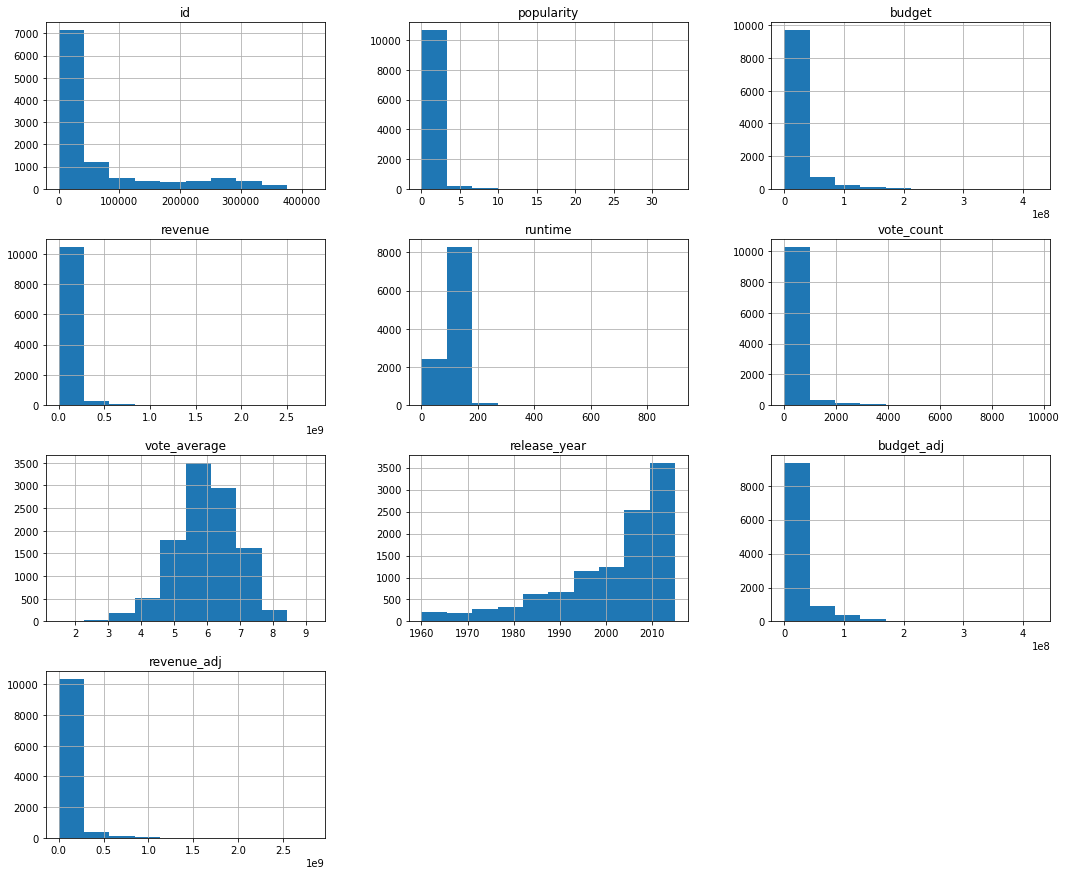

In [10]:
# view the distributions of different variables in the movies dataset.
movies.hist(figsize=(18,15))

Take aways after assessing the data.

The vote average has a normal/ bell curve shape with the highest vote average ranging between 5 and 7.
The release year is highly skewed to the left. The histogram depicts a gradual increase in the number of movies produced over the years.

### Data Cleaning and Transformation

In this phase of the analysis, we will remove all the columns that we do not need in the analysis, drop duplicate rows and fix the correct data types for easier data manipulation.

In [11]:
# drop extraneous columns
movies.drop(['imdb_id','cast','homepage','tagline','overview','keywords'],axis=1, inplace=True)

In [12]:
# confirm the rows are dropped

print(movies.columns)

movies.head()

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Drop Duplicates

In [13]:
# get rid of duplicates
movies.drop_duplicates(inplace=True)

In [14]:
# confirm that there are no more duplicates
movies.duplicated().sum()

0

### Fix data types

In [15]:
# id to a string
movies['id'] = movies['id'].astype(str)

In [16]:
# release_date to date data type
movies['release_date'] = pd.to_datetime(movies['release_date']) 

In [17]:
# confirm changes
movies.dtypes

id                              object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  What is the trend of the number of movies produced over the years?

In [18]:
# count of movies produced over the years
movies.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

Text(0, 0.5, 'Number of movies')

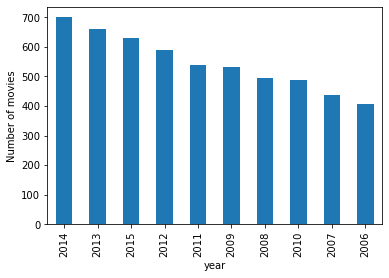

In [19]:
# top 10 movie release years
top_release_years = movies['release_year'].value_counts().head(10).plot(kind='bar')
top_release_years.set_xlabel('year')
top_release_years.set_ylabel('Number of movies')

In [20]:
# Define a function to plot histograms
def histChart(df, x_values, x_label, y_label):
    df.hist(x_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

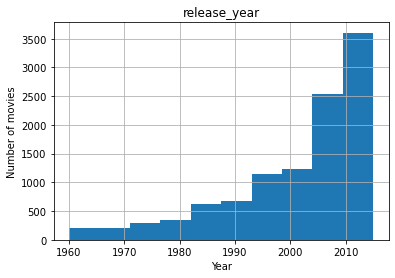

In [21]:
# histogram showing the distribution of number of movies released.
histChart(movies, 'release_year', 'Year', 'Number of movies')

Ans: The number of movies produced have increased gradually over the years. The data is skewed to the left.
The top 10 release years in descending order include: 2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006.

### Research Question 2:  What is the distribution of runtime minutes?

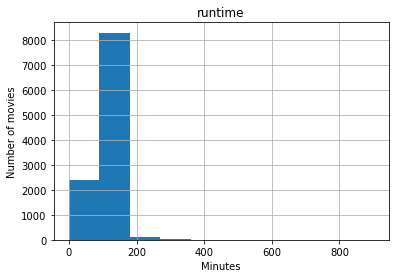

In [22]:
# histogram showing the distribution of runtime.
histChart(movies, 'runtime', 'Minutes', 'Number of movies')

Ans: Runtime is distributed between 0 to 180. There are no movies that run for more than 400 minutes.

### Research Question 3:  What is the largest budget used to produce a movie? Name the movies.

In [23]:
max_budget = movies['budget'].max()

max_budget


425000000

In [24]:
movies.query('budget == 425000000')

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0


Ans : Name of the movie is "The Warrior's Way" released in 2010 at a budget of 425000000

### Research Question 4:  What is the average rating of movies.

In [25]:
# Find the mean rating.
mean_rating = movies.vote_average.mean()

# round the mean rating to two decimal places.
round(mean_rating, 2)

5.98

ANS: The mean rating of the movies is 5.98

### Research Question 5:  What is the relationship between the vote_average and runtime?

In [26]:
# Define a function to plot scatter charts
def scatterChart(df, x_values, x_label, y_values, y_label, title):
    df.plot.scatter(x=x_values, y=y_values, alpha= 0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

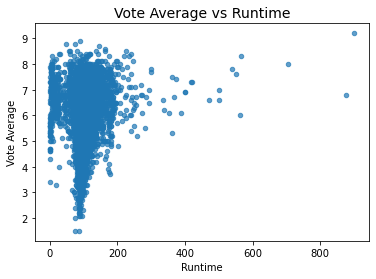

In [27]:
# use the scatter plot function to plot vote average vs runtime.
scatterChart(movies, 'runtime', 'Runtime', 'vote_average', 'Vote Average', 'Vote Average vs Runtime')

ANS: There is no distinct correlation between the two variables.

### Research Question 6:  What is the relationship between the budget used and revenue generated?

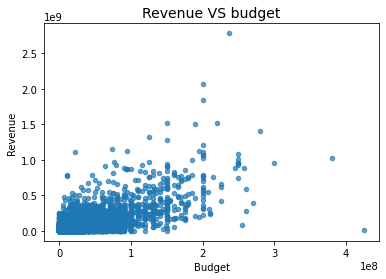

In [28]:
# use the scatter plot function to plot vote average vs runtime.
scatterChart(movies, 'budget', 'Budget', 'revenue', 'Revenue', 'Revenue VS budget')

Ans: Movies with lower budgets tend to generate lower income while movies with higher budgets tend to generate higher incomes.

<a id='conclusions'></a>
## Conclusions


From the movie dataset,
We had a successful analysis and answered the initial questions the analysis intended to answer.
We see a trend of an increase of the number of number of movies released. The highest number is in 2014, closely followed by 2013 and then 2015. From this trend, we expect a gradual increase in the future.

We also find out that most movies have runtime minutes ranging between 90 to 111 minutes. 
The largest budget used to produce a movie in the dataset is 425000000 dollars. 
Average rating of the movies is 5.98, the highest rated movie is at 9.2.
There is no correlation between the run time and average vote.
We however notice a positive correlation between revenue and budget whereby expensive movies rake in the most revenue.

### Limitations

Always remember that correlation does not mean causation. There may be other features that may cause the positve correlation between budget and revenue. This can be achieved with more data. For instance, season of release.

While analyzing the data, there are columns that were dropped. They were however few and I don't think they would change the findings of the analysis in a massive way.

The data's genre column has rich information that can be used to analyze different genres. This should be the next phase of the analysis to get a broader perspective of which genre is most profitable.

